# Pre-Processing & Exploratory Data Analysis

In [34]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

The dataset includes the following patient features:

- **`Age`**: Patient's age in years.
- **`Sex`**: Patient's gender.
- **`cp`**: Type of chest pain experienced:
  - `1`: Typical angina
  - `2`: Atypical angina
  - `3`: Non-anginal pain
  - `4`: Asymptomatic
- **`trtbps`**: Resting blood pressure measured in mm Hg.
- **`chol`**: Cholesterol level in mg/dl, as recorded by a BMI sensor.
- **`fbs`**: Fasting blood sugar above 120 mg/dl (`1` = true, `0` = false).
- **`rest_ecg`**: Resting electrocardiogram (ECG) results:
  - `0`: Normal
  - `1`: ST-T wave abnormality (T wave inversions and/or ST elevation or depression > 0.05 mV)
  - `2`: Signs of left ventricular hypertrophy based on Estes' criteria
- **`thalach`**: Maximum heart rate achieved during physical exertion.
- **`exng`**: Exercise-induced angina (`1` = yes, `0` = no).
- **`oldpeak`**: Previous peak.
- **`slp`**: Slope.
- **`caa`**: Number of major vessels visible through fluoroscopy (range: `0-3`).
- **`thall`**: Thal Rate.

**Output Variable:**

- **`target`**: Predicted likelihood of a heart attack (`0` = lower risk, `1` = higher risk).


In [35]:
# Import the dataset
data = pd.read_csv("heart.csv")
df = data
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
df.shape

(303, 14)

In [37]:
display(df.head())
display(df.tail())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [38]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [40]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [41]:
# Define columns
'''
The variable "class_cols" contains a list of the categorical features.
The variable "continuous_cols" contains a list of the features with continuous values.
The variable "target_col" contains the output column.
'''

categorical_cols = ["sex", "cp", "fbs", "exng", "restecg", "thall", "caa", "slp"]
continuous_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
target_col = ["output"]

**Data Preprocessing and Analysis Workflow**

In this workflow, we will follow a systematic approach to understand and prepare our dataset for modeling. The key steps involved are as follows:

1. **Exploratory Data Analysis (EDA)**:
   - Conduct comprehensive EDA to uncover insights about the data.
   - Generate various visualizations (e.g., histograms, box plots, scatter plots) to get a better understanding of feature distributions, relationships, and potential outliers.

2. **Train-Test Split**:
   - Split the dataset into **training** and **testing** sets to evaluate model performance.
   - This ensures that the model is trained on one portion of the data and validated on an unseen portion to avoid **data leakage**.

3. **Scaling Continuous Features**:
   - Apply `StandardScaler` to the continuous features to standardize their values.
   - This transformation will center the data around a mean of `0` and scale it to have a standard deviation of `1`.

By following these steps, we aim to prepare our dataset effectively for modeling, ensuring that we maximize the model's performance and reliability.


## Exploratory Data Analysis Graphs

### Correlation Matrix

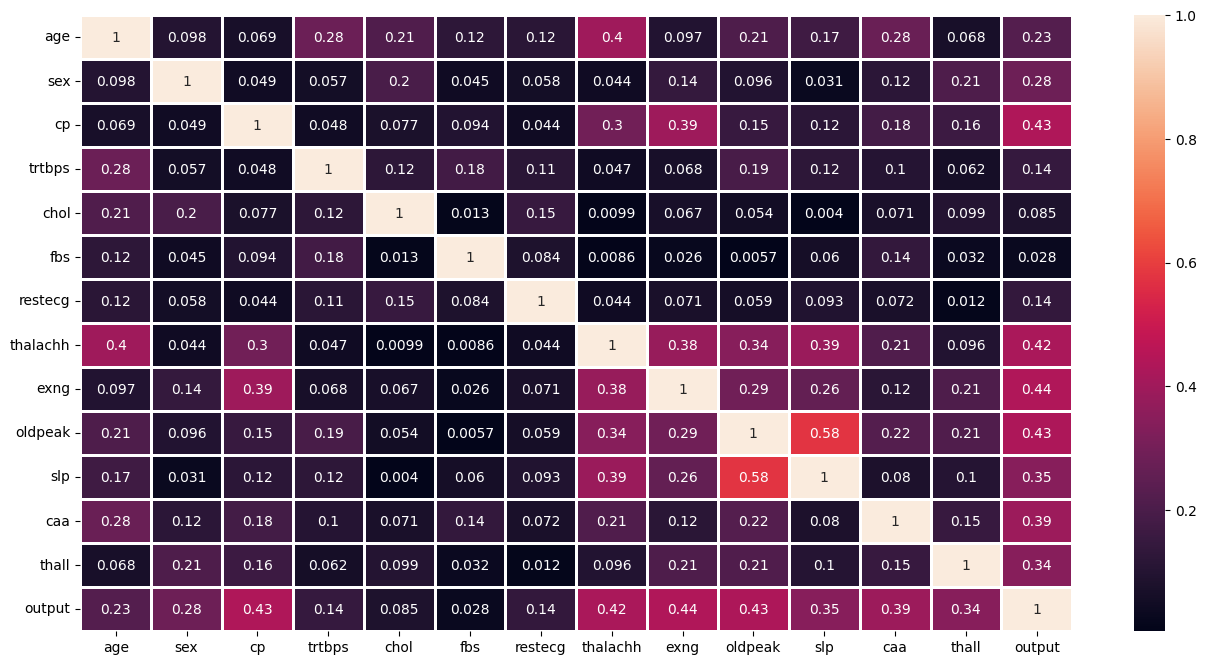

In [42]:
# Correlation Matrix
plt.figure(figsize=(16,8))
correlation=df.corr()
sns.heatmap(abs(correlation),lw=1,annot=True)
plt.show()

### Pair Plots

In [43]:
# Pairplot
# sns.pairplot(df, hue='output')
# plt.show()

### Histplots for the Continuous Features

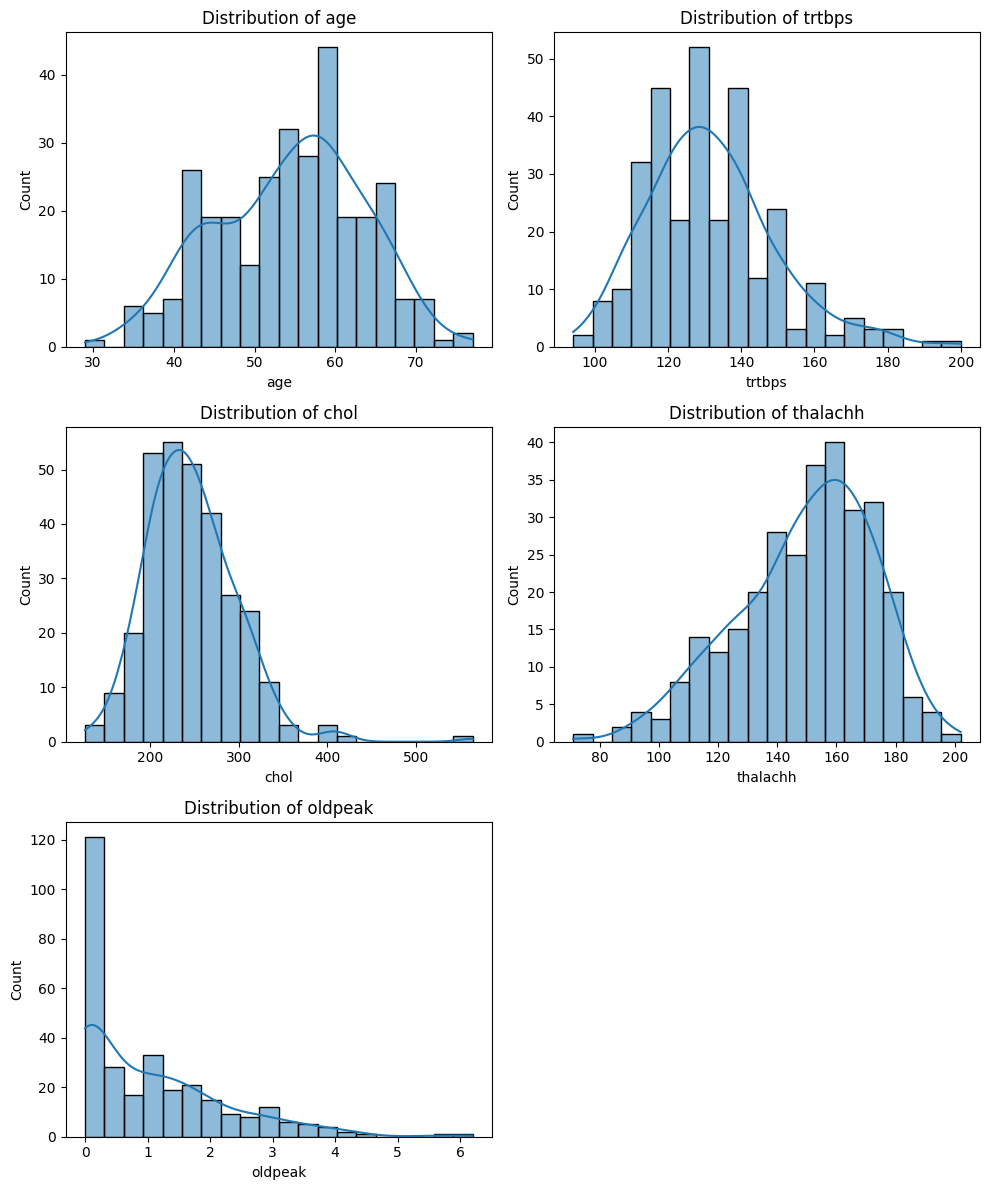

In [44]:
# Create histplots for the Continuous Features
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

sns.histplot(df['age'], bins=20, ax=ax[0, 0], kde=True)
ax[0, 0].set_title('Distribution of age')
sns.histplot(df['trtbps'], bins=20, ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of trtbps')
sns.histplot(df['chol'], bins=20, ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of chol')
sns.histplot(df['thalachh'], bins=20, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Distribution of thalachh')
sns.histplot(df['oldpeak'], bins=20, ax=ax[2, 0], kde=True)
ax[2, 0].set_title('Distribution of oldpeak')

# Hiding the unused subplot (Second graph in last row)
ax[2, 1].axis('off')


plt.tight_layout()
plt.show()


### Distribution of the Continuous Features with respect to the Target Variable

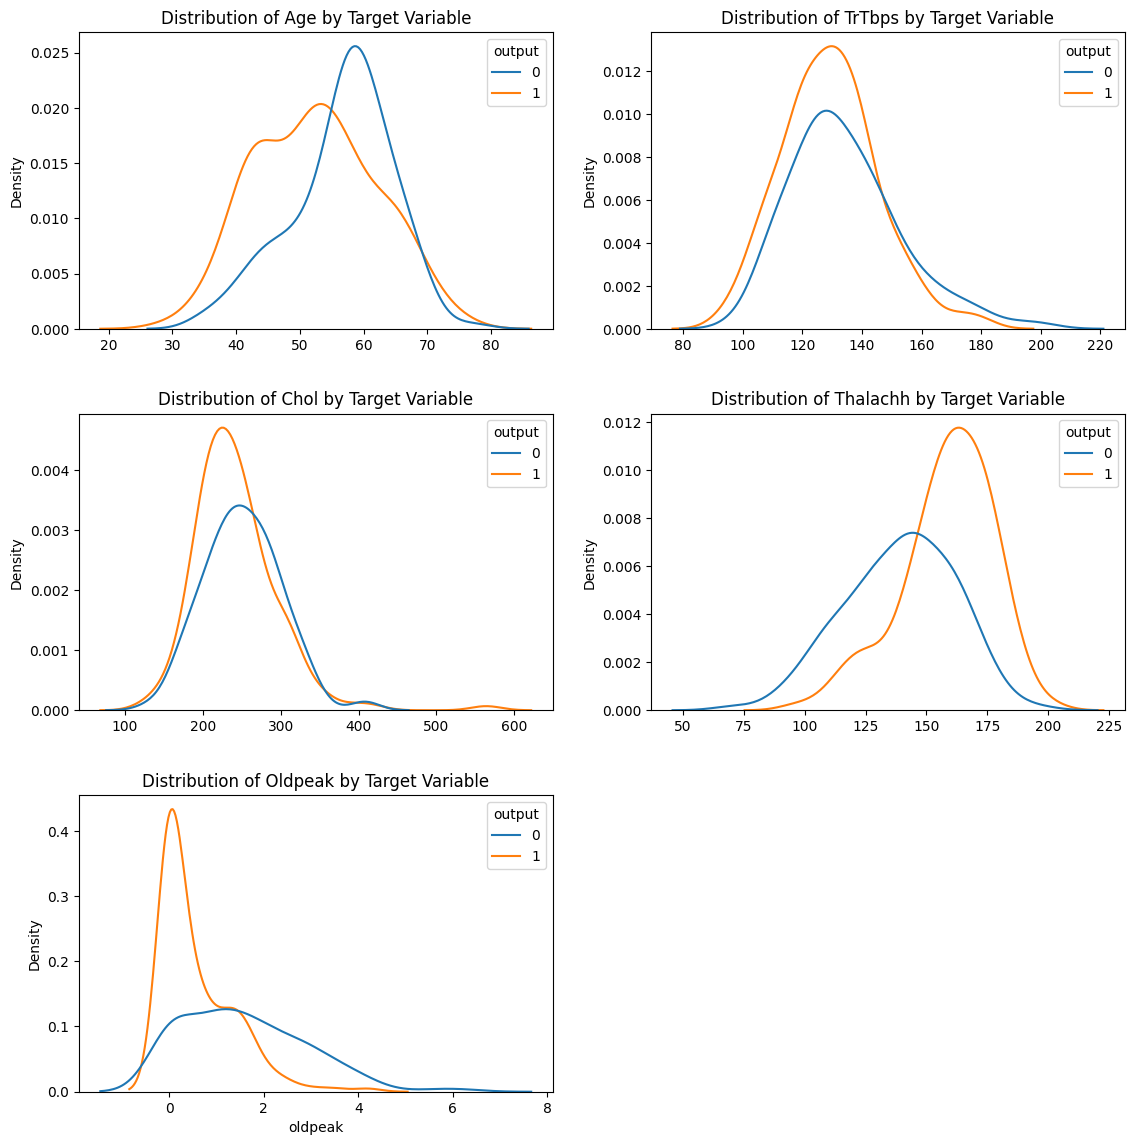

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.tight_layout(pad=4.0)

# Plot for 'age'
axes[0, 0].set_title("Distribution of Age by Target Variable")
sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])

# Plot for 'trtbps'
axes[0, 1].set_title("Distribution of TrTbps by Target Variable")
sns.kdeplot(data=df, x='trtbps', hue='output', ax=axes[0, 1])

# Plot for 'chol'
axes[1, 0].set_title("Distribution of Chol by Target Variable")
sns.kdeplot(data=df, x='chol', hue='output', ax=axes[1, 0])

# Plot for 'thalachh'
axes[1, 1].set_title("Distribution of Thalachh by Target Variable")
sns.kdeplot(data=df, x='thalachh', hue='output', ax=axes[1, 1])

# Plot for 'oldpeak'
axes[2, 0].set_title("Distribution of Oldpeak by Target Variable")
sns.kdeplot(data=df, x='oldpeak', hue='output', ax=axes[2, 0])

# Turn off the last empty subplot
axes[2, 1].axis('off')

# Set labels
for ax in axes[:2, :2].flat:
    ax.set_xlabel("")
    ax.set_ylabel("Density")

plt.show()


### Plot for Categorical Features with respect to the Target Variable

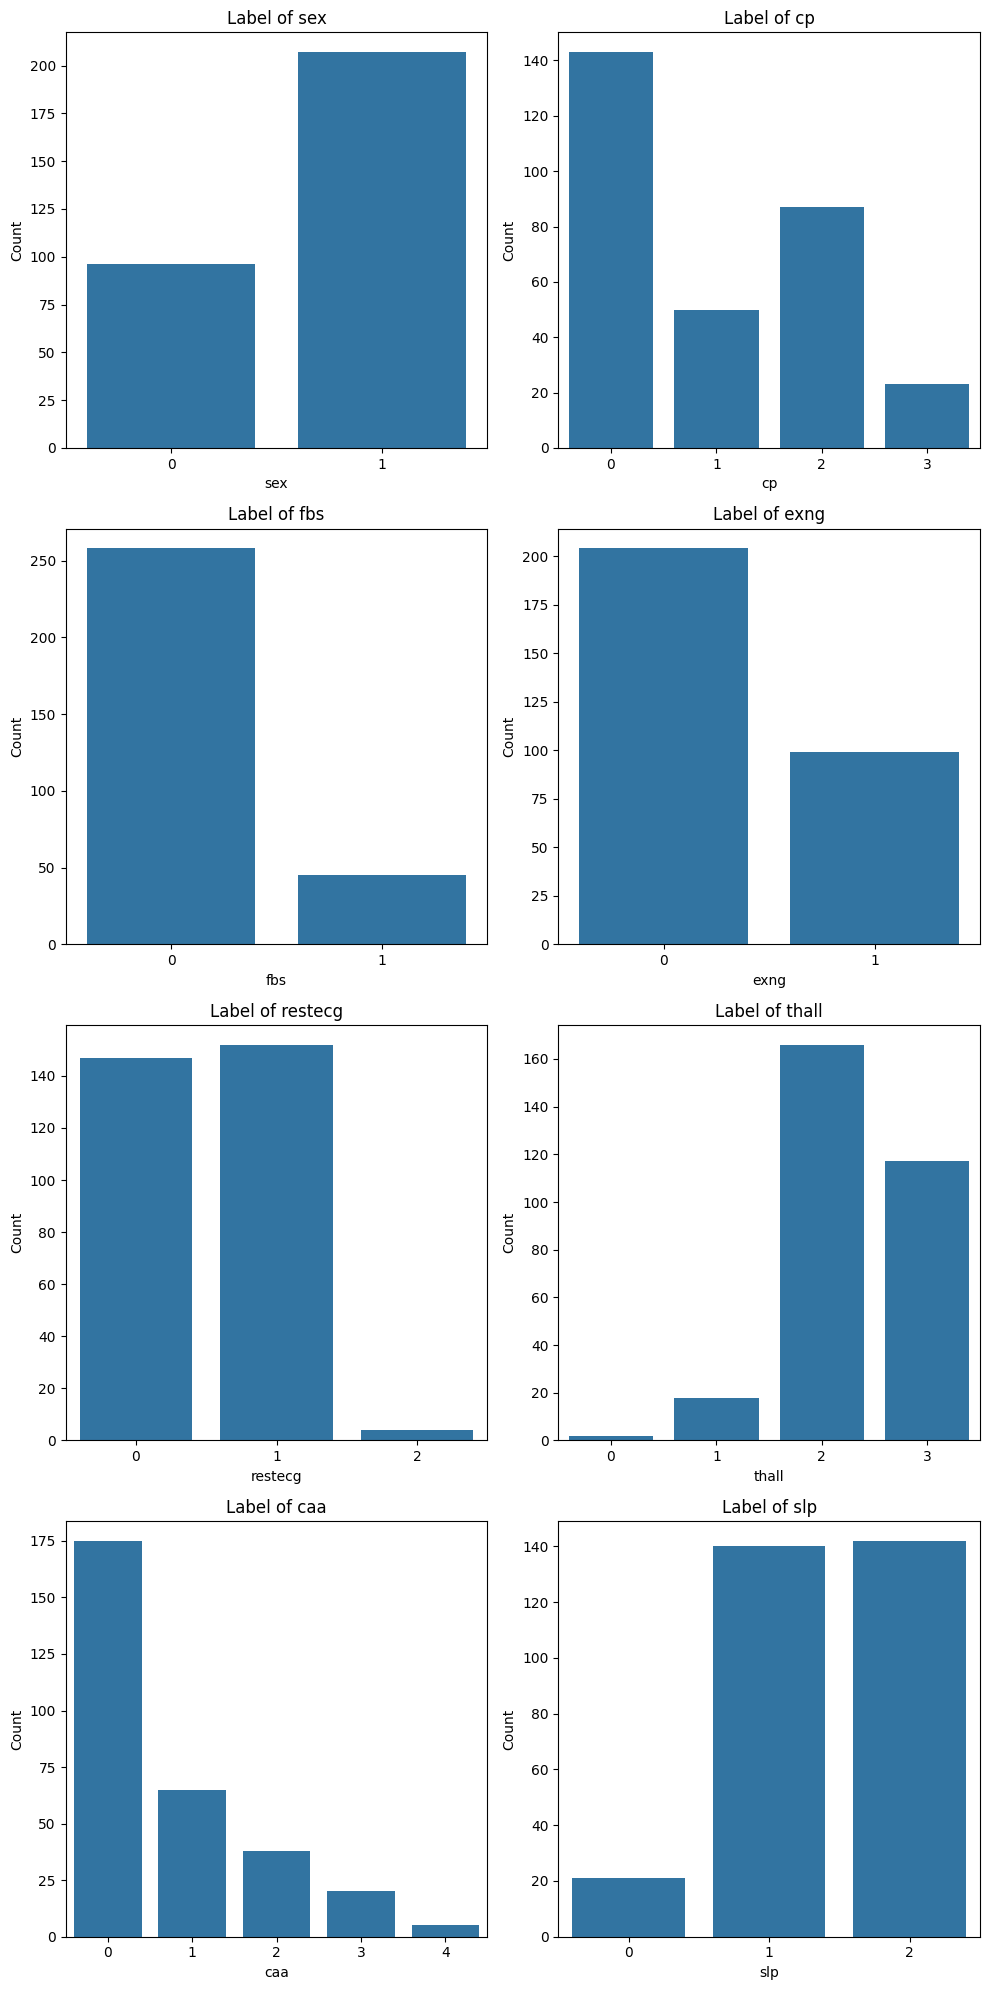

In [46]:
# Create bar plots for Categorical Features
fig, ax = plt.subplots(4, 2, figsize=(10, 20))

sns.countplot(x='sex', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Label of sex')
ax[0, 0].set_xlabel('sex')
ax[0, 0].set_ylabel('Count')

sns.countplot(x='cp', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Label of cp')
ax[0, 1].set_xlabel('cp')
ax[0, 1].set_ylabel('Count')

sns.countplot(x='fbs', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Label of fbs')
ax[1, 0].set_xlabel('fbs')
ax[1, 0].set_ylabel('Count')

sns.countplot(x='exng', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Label of exng')
ax[1, 1].set_xlabel('exng')
ax[1, 1].set_ylabel('Count')

sns.countplot(x='restecg', data=df, ax=ax[2, 0])
ax[2, 0].set_title('Label of restecg')
ax[2, 0].set_xlabel('restecg')
ax[2, 0].set_ylabel('Count')

sns.countplot(x='thall', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Label of thall')
ax[2, 1].set_xlabel('thall')
ax[2, 1].set_ylabel('Count')

sns.countplot(x='caa', data=df, ax=ax[3, 0])
ax[3, 0].set_title('Label of caa')
ax[3, 0].set_xlabel('caa')
ax[3, 0].set_ylabel('Count')

sns.countplot(x='slp', data=df, ax=ax[3, 1])
ax[3, 1].set_title('Label of slp')
ax[3, 1].set_xlabel('slp')
ax[3, 1].set_ylabel('Count')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


### Boxplots

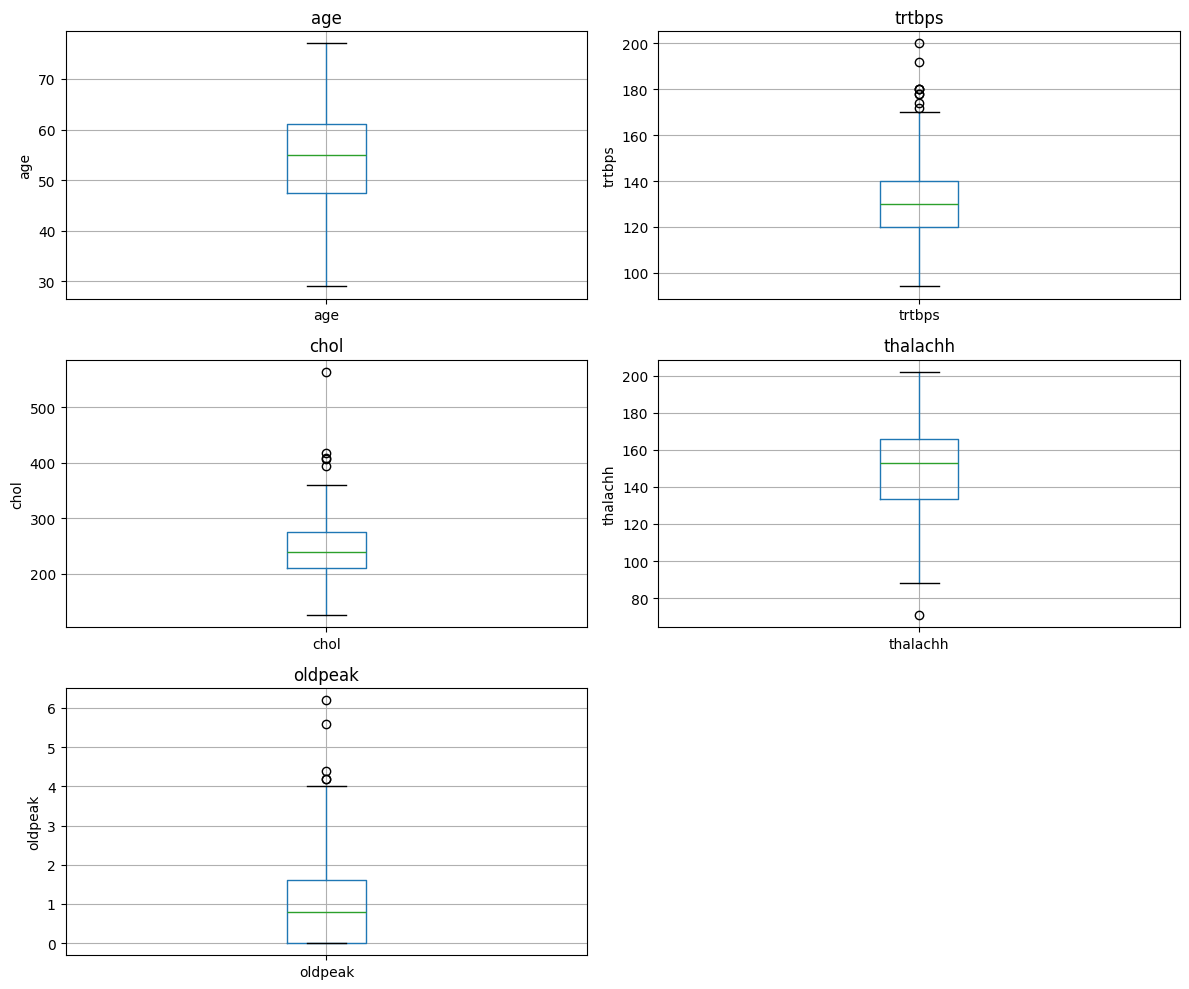

In [47]:
# Create the BoxPlots to identify Outliers in the Continuous Features

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('age')
fig.set_ylabel('age')

plt.subplot(3, 2, 2)
fig = df.boxplot(column='trtbps')
fig.set_title('trtbps')
fig.set_ylabel('trtbps')

plt.subplot(3, 2, 3)
fig = df.boxplot(column='chol')
fig.set_title('chol')
fig.set_ylabel('chol')

plt.subplot(3, 2, 4)
fig = df.boxplot(column='thalachh')
fig.set_title('thalachh')
fig.set_ylabel('thalachh')

plt.subplot(3, 2, 5)
fig = df.boxplot(column='oldpeak')
fig.set_title('oldpeak')
fig.set_ylabel('oldpeak')

# Hiding the unused subplot (Second graph in last row)
plt.subplot(3, 2, 6)
plt.axis('off')

plt.tight_layout()
plt.show()


In [48]:
# Remove Outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filter values within the IQR range
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

# Call the function for the continuous variables
df_cleaned = remove_outliers_iqr(df, 'age')
df_cleaned = remove_outliers_iqr(df_cleaned, 'trtbps')
df_cleaned = remove_outliers_iqr(df_cleaned, 'chol')
df_cleaned = remove_outliers_iqr(df_cleaned, 'thalachh')
df_cleaned = remove_outliers_iqr(df_cleaned, 'oldpeak')

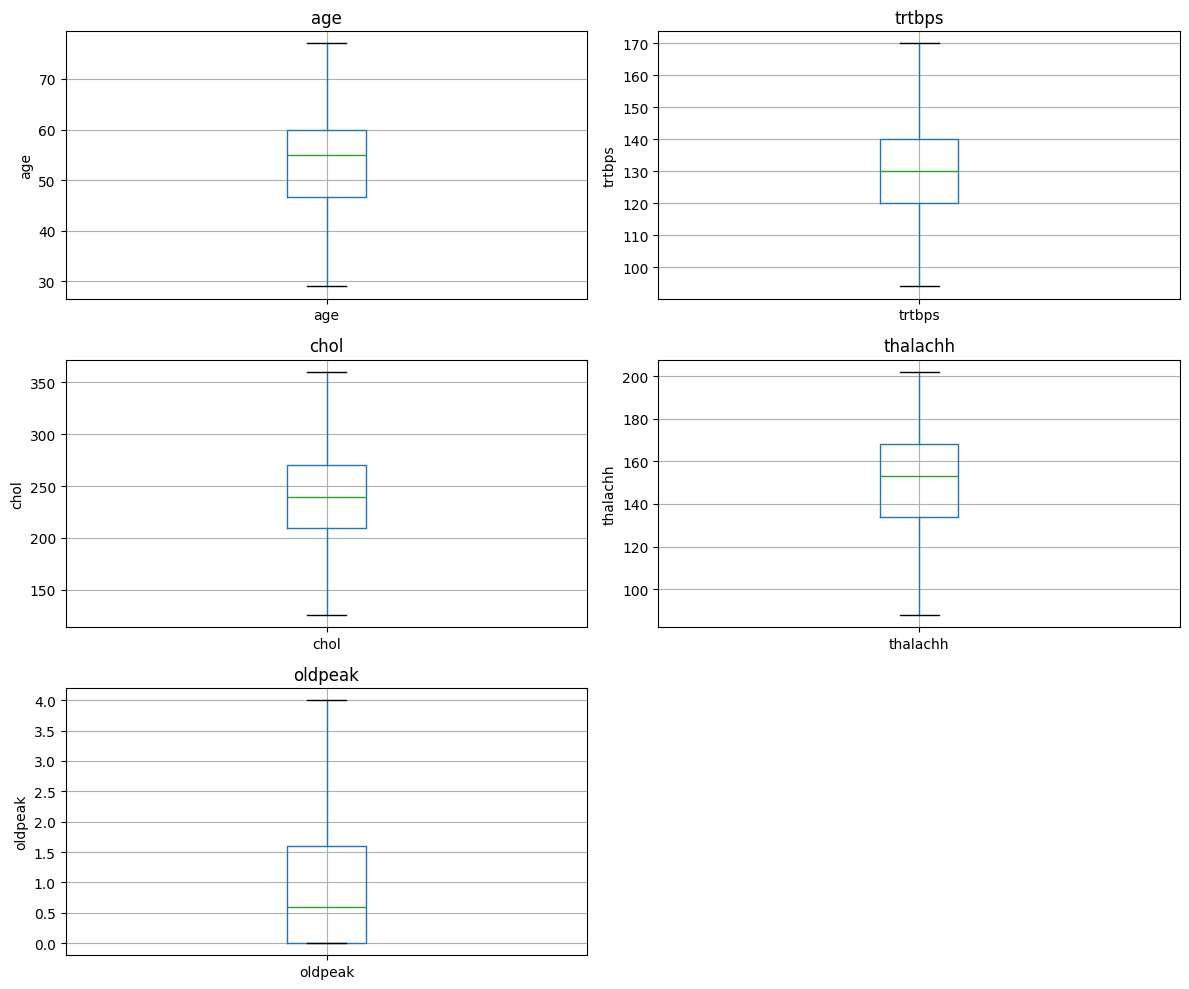

In [49]:
# Create the boxplots again to check whether the outliers have been removed or not

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
fig = df_cleaned.boxplot(column='age')
fig.set_title('age')
fig.set_ylabel('age')

plt.subplot(3, 2, 2)
fig = df_cleaned.boxplot(column='trtbps')
fig.set_title('trtbps')
fig.set_ylabel('trtbps')

plt.subplot(3, 2, 3)
fig = df_cleaned.boxplot(column='chol')
fig.set_title('chol')
fig.set_ylabel('chol')

plt.subplot(3, 2, 4)
fig = df_cleaned.boxplot(column='thalachh')
fig.set_title('thalachh')
fig.set_ylabel('thalachh')

plt.subplot(3, 2, 5)
fig = df_cleaned.boxplot(column='oldpeak')
fig.set_title('oldpeak')
fig.set_ylabel('oldpeak')

plt.subplot(3, 2, 6)
plt.axis('off')

plt.tight_layout()
plt.show()

## Pre-Processing the Data
The following steps will be performed :
- Splitting the data into test and train data.
- Scaling the Continuous Features

We shall now perform the train-test splitting of the dataset.

In [50]:
categorical_cols = ["sex", "cp", "fbs", "exng", "restecg", "thall", "caa", "slp"]
continuous_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
target_col = ["output"]

### Train/Test Split

In [51]:
from sklearn.model_selection import train_test_split
# Separate the features and target
X = df_cleaned.drop(columns='output')
y = df_cleaned[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (213, 13)
Testing set shape: (71, 13)


### Scaling the Continuous Features

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale in the training set
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

# Scale in the test set
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
224,0.002099,1,0,-1.246740,-0.111092,0,1,-1.089146,1,1.859048,1,1,3
52,0.896161,1,2,0.007360,-0.285885,0,1,-0.188046,0,0.854539,1,3,3
109,-0.444932,0,0,-1.246740,0.216645,0,0,0.397668,0,-0.953575,2,0,2
192,0.002099,1,0,-0.619690,-1.225396,0,1,-1.674861,0,0.452736,1,1,3
79,0.449130,1,2,-1.560265,-0.089243,0,0,0.172394,1,-0.350870,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,-0.221417,1,3,-0.745100,-1.269094,0,0,1.794373,0,-0.953575,1,0,1
258,0.896161,0,0,1.261460,-0.001846,0,1,0.172394,1,0.452736,1,0,2
149,-1.338994,1,2,0.007360,-1.400189,0,1,-0.007826,0,-0.953575,2,0,2
98,-1.227236,1,2,0.007360,1.549440,0,1,0.532833,0,0.954990,2,1,2


# Implementations of various ML Models

In [53]:
# To suppress the unwanted warnings
import warnings
warnings.filterwarnings("ignore")

''' For each model's output, we will be implementing printing the classification report, AUC/ROC Curve in addition to the accuracy score'''
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

# Initialize & train the model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Prediction on the test data
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Logistic Regression is : {accuracy * 100:.4f}%")

The accuracy of Logistic Regression is : 87.3239%


We will plot the Confusion Matrix, AUC/ROC Curve & the Classification Report

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.83      0.97      0.90        40

    accuracy                           0.87        71
   macro avg       0.89      0.86      0.87        71
weighted avg       0.89      0.87      0.87        71



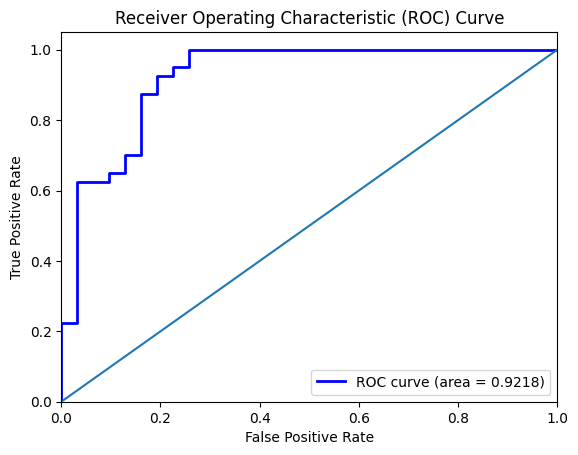

In [55]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve


# Ensure y_test is treated as a Series if it's a single-column DataFrame
if isinstance(y_test, pd.DataFrame) and y_test.shape[1] == 1:
    y_test = y_test.squeeze()


if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")
# Initialize & train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediction on Test Data
predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print(f"The accuracy of Gaussian Naive Bayes model is: {accuracy * 100:.4f}%")

The accuracy of Gaussian Naive Bayes model is: 83.0986%


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.82      0.90      0.86        40

    accuracy                           0.83        71
   macro avg       0.84      0.82      0.83        71
weighted avg       0.83      0.83      0.83        71



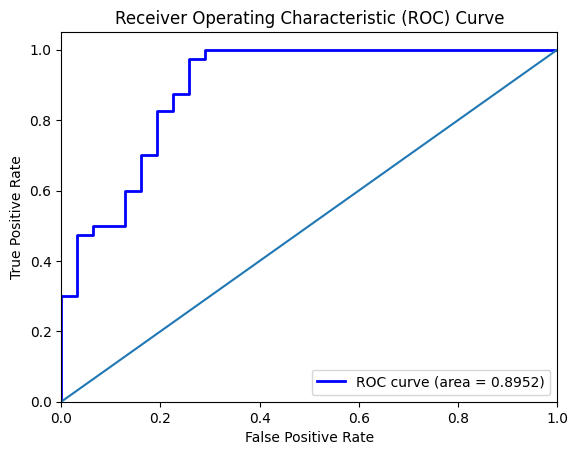

In [57]:
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predicted))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Bernoulli Naive Bayes

In [58]:
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")

# Initialize & train the model
model = BernoulliNB()
model.fit(X_train, y_train)

# Prediction on Test Data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Bernoulli Naive Bayes model is: {accuracy * 100:.4f}%")

The accuracy of Bernoulli Naive Bayes model is: 83.0986%


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.82      0.90      0.86        40

    accuracy                           0.83        71
   macro avg       0.84      0.82      0.83        71
weighted avg       0.83      0.83      0.83        71



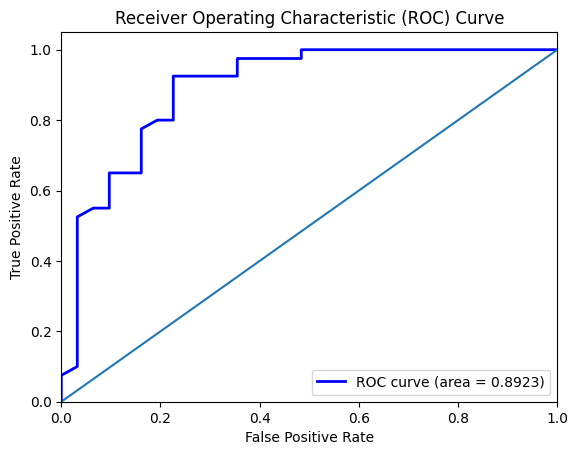

In [59]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predicted))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Support Vector Machine (SVM)

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],  # Include all kernel types
    'gamma': ['scale', 'auto']  # Gamma values
}

# Initialize GridSearchCV with SVC
grid_search = GridSearchCV(SVC(probability=True), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.4f}%")

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prediction on the Test Data
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of SVM with optimal hyperparameters is: {accuracy * 100:.4f}%")


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 82.6467%
The accuracy of SVM with optimal hyperparameters is: 85.9155%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        31
           1       0.80      1.00      0.89        40

    accuracy                           0.86        71
   macro avg       0.90      0.84      0.85        71
weighted avg       0.89      0.86      0.85        71



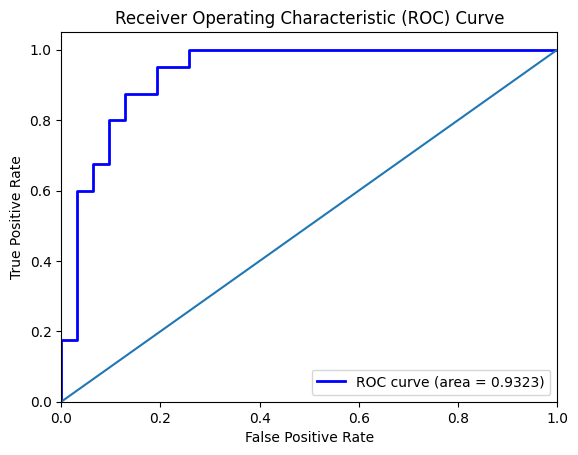

In [61]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],        # Split criteria
    'max_depth': [None, 10, 20, 30, 40, 50], # Depth of the tree
    'min_samples_split': [2, 10, 20],        # Min samples to split a node
    'min_samples_leaf': [1, 5, 10]           # Min samples at a leaf node
}

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=0)

# Find the best parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Train the classifier on the training set
best_dt_classifier.fit(X_train, y_train)

# Predictiction on the test set
y_pred = best_dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Decision Tree: {accuracy * 100:.4f}%")

The accuracy of Decision Tree: 84.5070%



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.87      0.85      0.86        40

    accuracy                           0.85        71
   macro avg       0.84      0.84      0.84        71
weighted avg       0.85      0.85      0.85        71



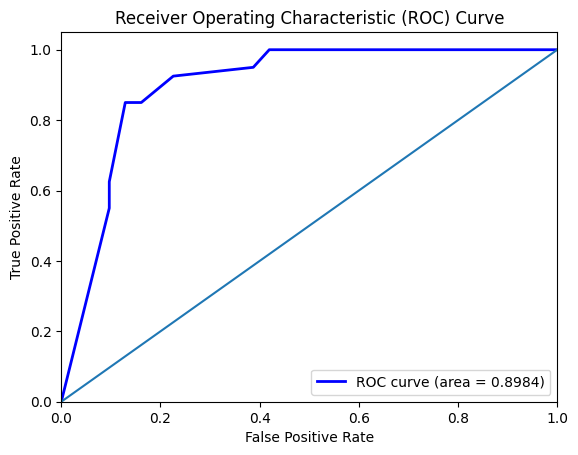

In [63]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = best_dt_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## K-Nearest Neighbors (KNN)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Implementing the KNN model

# Consider n_neighbours = 5 initially.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Use the model on the test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of KNN: {accuracy * 100:.4f}%")

The accuracy of KNN: 85.9155%



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.81        31
           1       0.81      0.97      0.89        40

    accuracy                           0.86        71
   macro avg       0.88      0.84      0.85        71
weighted avg       0.88      0.86      0.86        71



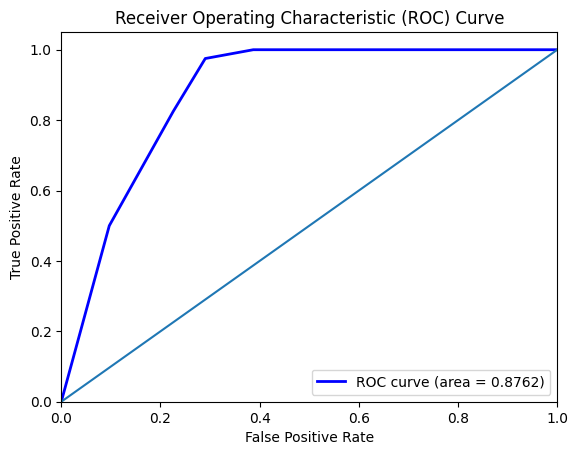

In [65]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Multi-Layer Perceptron

Epoch [10/100], Loss: 0.5994
Epoch [20/100], Loss: 0.6726
Epoch [30/100], Loss: 0.3745
Epoch [40/100], Loss: 0.6872
Epoch [50/100], Loss: 0.3302
Epoch [60/100], Loss: 0.3905
Epoch [70/100], Loss: 0.7234
Epoch [80/100], Loss: 0.3149
Epoch [90/100], Loss: 0.4195
Epoch [100/100], Loss: 0.3313
Accuracy: 85.92%


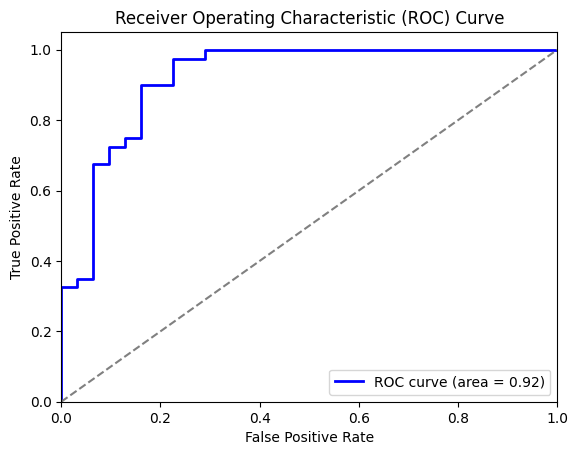


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.84      0.93      0.88        40

    accuracy                           0.86        71
   macro avg       0.86      0.85      0.85        71
weighted avg       0.86      0.86      0.86        71



In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Define the PyTorch model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(13, 16)  # Input layer
        self.dropout1 = nn.Dropout(0.25)  # Dropout layer
        self.fc2 = nn.Linear(16, 8)  # Hidden layer
        self.dropout2 = nn.Dropout(0.25)  # Dropout layer
        self.fc3 = nn.Linear(8, 2)  # Output layer (2 classes)
        self.relu = nn.ReLU()  # ReLU activation
        self.softmax = nn.Softmax(dim=1)  # Softmax activation for multi-class output

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return self.softmax(x)

# Create the model
model = MLP()

# Specify loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Using CrossEntropyLoss for multi-class classification
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors (Assuming X_train and y_train are your training data)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # Ensure X_train is a DataFrame
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)  # Convert Series to NumPy and then to tensor

# Create Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for features, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        labels = labels.view(-1)
        outputs = model(features)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # Ensure X_test is a DataFrame
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)  # Convert Series to NumPy and then to tensor

    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    for features, labels in test_loader:
        outputs = model(features)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        all_preds.append(outputs.numpy())  # Append the predicted probabilities
        all_labels.append(labels.numpy())  # Append the true labels
        total += labels.size(0)  # Count total samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

    accuracy = 100 * correct / total  # Calculate accuracy
    print(f'Accuracy: {accuracy:.2f}%')

# Convert predictions and labels to numpy arrays
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_preds[:, 1])  # Using probabilities of the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(all_labels, np.argmax(all_preds, axis=1)))  # Use the predicted class labels
